In [169]:
import pandas as pd
import joblib   
import numpy as np
from sklearn.model_selection import train_test_split
from SimulateDay import scale_data, predict_action, get_stock_data, add_columns, stock_market_simulation
import xgboost as xgb
import joblib
import altair as alt

simResults = pd.read_csv('simResults/sim_results.csv')
specific_model_decisions = pd.read_csv('simResults/specific_model_decisions.csv').sort_values(by="Day").sort_values(by='Stock Name')
general_model_decisions = pd.read_csv('simResults/general_model_decisions.csv').sort_values(by="Day").sort_values(by='Stock Name')

In [88]:
general_model_decisions[general_model_decisions['Action']  == 'Buy']

,Stock Name,Day,Action,Stock Price,Cash,Shares Held,Portfolio Value,Date


In [122]:
specific_model_decisions[(specific_model_decisions['Portfolio Value'] < 10000.) & (specific_model_decisions['Day'] == 3.0)]

,Stock Name,Day,Action,Stock Price,Cash,Shares Held,Portfolio Value,Date
1898,DG,3.0,Buy,79.790001,9672.969994,4.0,9992.129997,2024-10-14
1814,DXCM,3.0,Buy,69.180000,9722.751999,4.0,9999.472000,2024-10-14
1731,VLO,3.0,Buy,141.300003,9434.020691,4.0,9999.220703,2024-10-14


In [128]:
specific_model_decisions[(specific_model_decisions['Portfolio Value'] > 10030) & (specific_model_decisions['Day'] == 3.0)]

,Stock Name,Day,Action,Stock Price,Cash,Shares Held,Portfolio Value,Date
1586,ELV,3.0,Buy,509.859985,8004.690033,4.0,10044.129974,2024-10-14
1835,TYL,3.0,Buy,600.179993,7631.435059,4.0,10032.155029,2024-10-14
1521,UNH,3.0,Buy,606.210022,7610.019958,4.0,10034.860046,2024-10-14


In [159]:
specific_model_decisions.describe()

,Day,Stock Price,Cash,Shares Held,Portfolio Value
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,1.259572,222.372520,9866.318401,0.636067,10000.781678
std,0.934284,519.803202,528.759930,1.115172,8.126706
min,0.000000,7.540000,0.000000,0.000000,9900.495117
25%,1.000000,69.395000,9913.554996,0.000000,10000.000000
50%,1.000000,125.239998,10000.000000,0.000000,10000.000000
75%,2.000000,232.779999,10000.000000,1.000000,10000.000000
max,4.000000,9876.860352,10000.000000,4.000000,10308.923541


In [65]:
ZBH = specific_model_decisions[specific_model_decisions['Stock Name'] == 'ZBH']

In [162]:
modelComparison = pd.read_csv('simResults/MODELCOMPARISON.csv', index_col=0)
modelComparison.sort_values(by=['Total Profit %'], ascending=False).head(10)


,Model,Stock,Final Portfolio Value,Total Profit %
5,Stacking,AAPL,12560.38,25.60
1,Random Forest,AAPL,12438.13,24.38
3,XGBoost,AAPL,12404.69,24.04
4,Specific Model,AAPL,12404.69,24.04
0,Logistic Regression,AAPL,12010.10,20.01
9,XGBoost,MSFT,11808.35,18.08
8,SVM,MSFT,11803.34,18.03
10,Specific Model,MSFT,11774.20,17.74
6,Logistic Regression,MSFT,11677.37,16.77
7,Random Forest,MSFT,11187.02,11.87


In [163]:
import altair as alt

chart = alt.Chart(modelComparison).mark_bar().encode(
    x=alt.X('Stock:N', title='Tested Stocks'),
    y=alt.Y('Total Profit %:Q', title='Total Profit %'),
    color='Model:N',
    column='Model:O'
).properties(
    width=100,
    height=800,
    title='Total Profit % by Model Over Year To date Simulation',
    center=True
).configure_axis(
    labelAngle=45
)

chart.display()


alt.Chart(...)

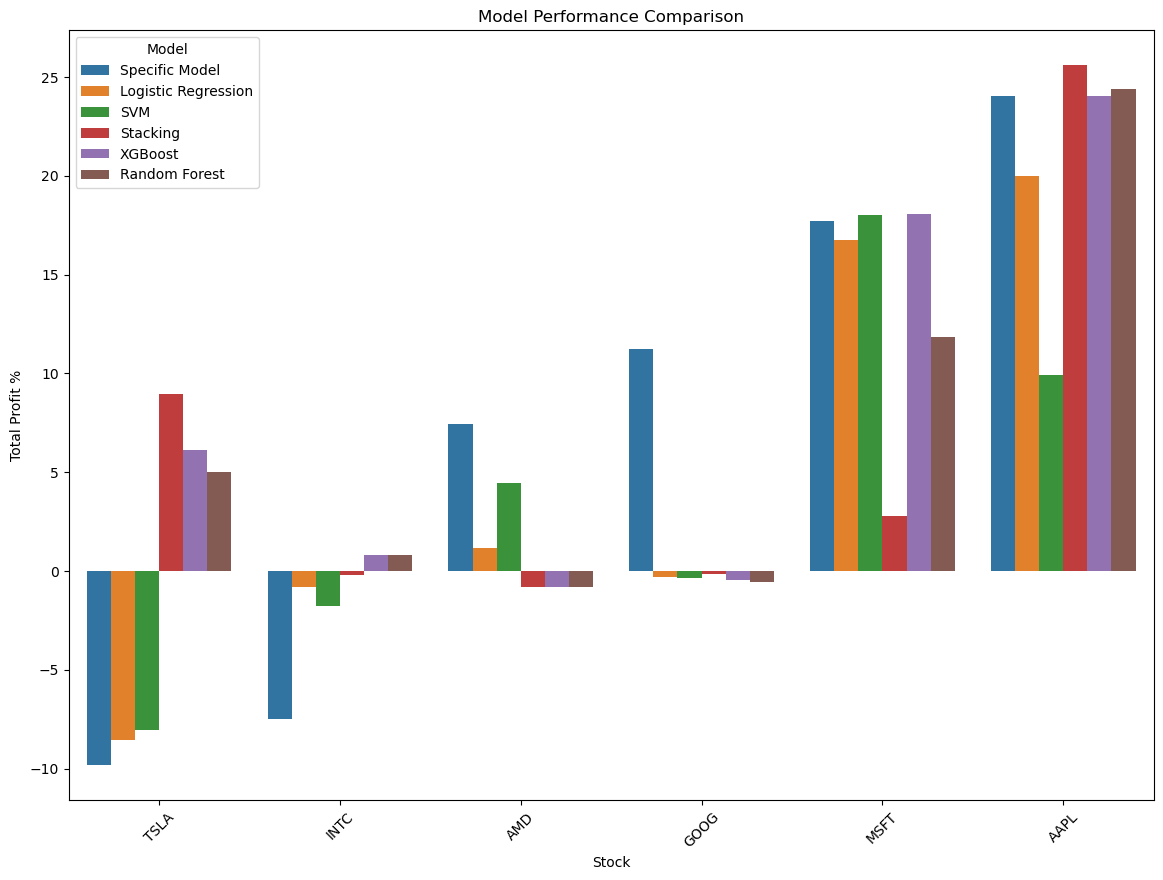

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.barplot(x='Stock', y='Total Profit %', hue='Model', data=modelComparison)

plt.title('Model Performance Comparison')
plt.xlabel('Stock')
plt.ylabel('Total Profit %')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()

In [189]:
def get_final_portfolio_values(df):
    # Group by 'Stock Name' and get the last row for each group
    final_values = df.groupby('Stock Name').apply(lambda x: x.iloc[-1])
    
    # Extract 'Stock Name' and 'Portfolio Value' columns
    result = final_values[['Stock Name', 'Portfolio Value']].reset_index(drop=True)
    
    return result
final_portfolio_values = get_final_portfolio_values(simResults)
final_portfolio_values['Profit %'] = (final_portfolio_values['Portfolio Value'] - 10000) / 10000 * 100
alt.Chart(final_portfolio_values).mark_bar().encode(
    x='Stock Name',
    y='Profit %',
    color=alt.condition(
        alt.datum['Profit %'] > 0,
        alt.value('green'),
        alt.value('red')
    )
).properties(
    title='Final Portfolio Value by Stock',
    width=800,
    height=400
).configure_axis(
    labelAngle=45
).display()

alt.Chart(...)

In [178]:
simResults

,Stock Name,Day,Action,Stock Price,Cash,Shares Held,Portfolio Value,Date
0,AAPL,0,Buy,167.449997,9832.550003,1.0,10000.000000,2023-05-03
1,AAPL,1,Buy,165.789993,9666.760010,2.0,9998.339996,2023-05-04
2,AAPL,2,Hold,173.570007,9666.760010,2.0,10013.900024,2023-05-05
3,AAPL,3,Buy,173.500000,9493.260010,3.0,10013.760010,2023-05-08
4,AAPL,4,Buy,171.770004,9321.490005,4.0,10008.570023,2023-05-09
...,...,...,...,...,...,...,...,...
3280,INTC,360,Buy,23.320000,7863.190001,59.0,9239.069983,2024-10-08
3281,INTC,361,Hold,23.459999,7863.190001,59.0,9247.329947,2024-10-09
3282,INTC,362,Buy,23.219999,7839.970001,60.0,9233.169960,2024-10-10
3283,INTC,363,Hold,23.559999,7839.970001,60.0,9253.569969,2024-10-11
